<a href="https://colab.research.google.com/github/leunco/Hands_On_MachineLearning/blob/main/3%EC%A3%BC%EC%B0%A8/%EA%B9%80%EB%8B%A4%EC%98%81/Chap6_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

## Chap6. 결정 트리
**결정 트리**(decision tree)는 분류와 회귀 작업, 다중출력 작업도 가능한 다재다능한 머신러닝 알고리즘으로, 매우 복잡한 데이터셋도 학습할 수 있다.

결정 트리는 **랜덤 포레스트의 기본 구성 요소**이기도 하다.

결정 트리의 여러 장점 중 하나는 데이터 전처리가 거의 필요하지 않다는 것이다. 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않다.

앞으로 결정 트리의 훈련, 시각화, 예측 방법에 대해 살펴보고, 사이킷런의 `CART` 훈련 알고리즘을 학습한다. 트리의 규제를 가하는 방법과 회귀 문제에 적용하는 방법을 학습하고, 결정 트리의 제약 사항에 관해 살펴본다.


## 6.1 결정 트리 학습과 시각화
결정 트리를 이해하기 위해 먼저 결정 트리 모델 하나를 만들어서 어떻게 예측하는지 살펴본다.

붓꽃 데이터셋에 `DecisionTreeClassifier`를 만들어서 훈련시킨다.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

`export_graphviz()` 함수를 사용하면 훈련된 결정 트리를 시각화할 수 있다.

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

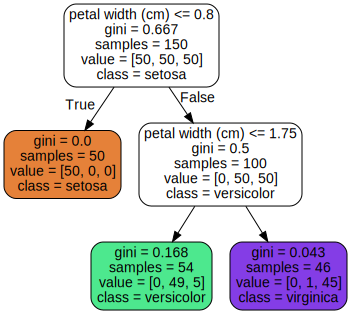

In [ ]:
from graphviz import Source
Source.from_file("iris_tree.dot")

## 6.2 예측하기
위의 그림은 결정 트리를 시각화한 것이다. 새로 발견한 붓꽃의 품종을 분류하려 한다고 가정할 때, 트리가 어떻게 예측을 만들어내는지 살펴본다.

먼저 **깊이가 0인 맨 꼭대기의 노드인 루트 노드**에서 시작한다. 이 노드는 꽃잎의 길이가 2.45cm보다 짧은지 검사하고, 만약 그렇다면 **깊이가 1**인 왼쪽의 **자식 노드**로 이동한다. 이 경우에는 이 노드가 **자식 노드를 가지지 않는 노드인 리프 노드**이므로 추가적인 검사를 하지 않는다. 노드에 있는 예측 클래스를 보고 결정 트리는 꽃의 품종을 Setosa로 예측한다.

만약 이번에는 꽃잎의 길이가 2.45cm보다 길다면 마찬가지로 깊이가 1인 오른쪽의 자식 노드로 이동한다. 이 노드는 리프 노드가 아니므로 추가로 '꽃잎의 너비가 1.75cm보다 작은지'를 검사한다. 이 조건을 만족한다면 이 꽃은 깊이가 2인 왼쪽 노드로 이동하여 Versicolor로 예측될 것이다.

사이킷런은 **이진 트리만 만드는 `CART` 알고리즘**을 사용한다. 따라서 리프 노드 외의 모든 노드는 **자식 노드를 2개씩** 가진다. 즉 모든 질문의 답이 예/아니오인 것이다.

노드의 **`samples` 속성은 얼마나 많은 훈련 샘플이 적용되었는지** 개수를 센 것이다.

노드의 **`value` 속성은 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지**를 알려준다.

노드의 **`gini` 속성은 불순도를 측정**한다. 한 노드의 모든 샘플이 전부 같은 클래스에 속해있다면 이 노드를 순수하다고 하며 gini는 0이다.

지니 불순도 점수는 다음과 같은 식으로 계산한다.

> ***지니 불순도***

$G_i = 1-\displaystyle\sum_{k=1}^n {p_{i,k}}^2$
 - ${p_{i,k}}^2$는 i번째 노드에 있는 훈련 샘플 중에서 클래스 k에 속한 샘플의 비율

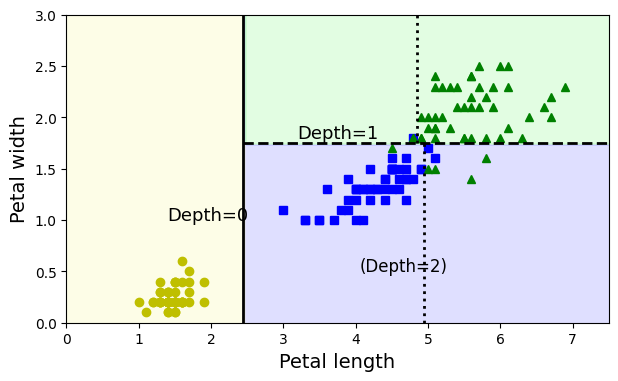

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(7, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=13)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=12)
plt.show()

위의 그림은 이 결정 트리의 결정 경계를 보여준다.

굵은 수직선이 깊이가 0인 루트 노드의 결정 경계를 나타낸다. 즉 꽃잎의 길이가 2.45cm인 기준이다.

왼쪽 영역은 Setosa만 있는 순수 노드이기 때문에 더는 나눌 수 없다. 그러나 오른쪽 영역은 순수 노드가 아니므로 꽃잎 너비가 1.75cm인 파선을 기준으로 나누어진다.

결정 트리의 `max_depth`를 2로 설정했기 때문에 결정 트리는 깊이가 2인 자식 노드를 만들면 더이상 분할되지 않는다.

#### 화이트박스와 블랙박스
화이트박스
- 직관적이고 간단하고 명확한 방법을 사용하여 결정 방식을 이해하기 쉽다.
- 결정 트리

블랙박스
- 성능이 뛰어나고 예측을 만드는 연산 과정을 쉽게 확인할 수 있다.
- 그러나 왜 그런 예측을 만드는지를 쉽게 설명하기 어렵다.
- 랜덤 포레스트, 신경망
- 예를 들어 신경망이 어떤 사람이 사진에 있다고 판단했을 때, 무엇이 이런 예측을 하게 했는지 파악하기 어렵다. 모델이 그 사람의 눈을 인식했는지, 입 또는 코를 인식했는지 알 수 없다는 것이다.

## 6.3 클래스 확률 추정
결정 트리는 **한 샘플이 특정 클래스 k에 속할 확률을 추정**할 수도 있다.

먼저 이 샘플에 대한 리프 노드를 찾기 위해 트리를 탐색하고, 그 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환한다. **추정한 각 클래스별 확률**을 확인하기 위해서는 모델에 `predict_proba()` 인스턴스를 적용하면 된다.

또한 `predict()` 인스턴스를 적용하면 추정한 확률 중에 **가장 높은 확률값을 가진 클래스**를 출력할 수 있다.

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

## 6.4 CART 훈련 알고리즘
사이킷런은 결정 트리를 훈련시키기 위해 `CART`(Classification And Regression Tree) 알고리즘을 사용한다.

먼저 훈련 세트를 하나의 특성 $k$의 임계값 $t_k$를 사용하여 2개의 서브셋으로 나눈다. 이때 $(k, t_k)$는 크기에 따른 가중치가 적용된 가장 순수한 서브셋으로 나눌 수 있는 짝을 찾는다.

`CART` 알고리즘은 다음과 같은 비용 함수를 최소화해야 한다.

> ***분류에 대한 CART 비용 함수***

$J(k,t_k)=\frac{m_l}{m}G_l+\frac{m_r}{m}G_r$
 - $G_l/G_r$: 왼쪽/오른쪽 서브셋의 불순도
 - $m_l/m_r$: 왼쪽/오른쪽 서브셋의 샘플 수

`CART` 알고리즘이 훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나누고, 그 다음엔 서브셋의 서브셋을 또 나누는 방식으로 반복한다. 이 과정은 `max_depth`로 정의된 최대 깊이가 되거나, 불순도를 줄이는 분할을 찾을 수 없을 때가 되면 중지한다.

그 외에도 `min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes` 등의 매개변수도 반복을 중지하는 조건에 관여한다.

## 6.5 계산 복잡도
모델을 이용해 예측하기 위해서는 결정 트리를 루트 노드에서부터 리프 노드까지 탐색해야 한다. 일반적으로 결정 트리는 거의 균형을 이루고 있으므로 **결정 트리를 탐색하기 위해서는 약 $O(\log_2(m))$개의 노드를 거쳐야 한다.**

**각 노드는 하나의 특성 값만 확인**하기 때문에 **예측에 필요한 전체 복잡도**는 특성 수와 무관하고 **노드 수와 동일한 $O(\log_2(m))$**이다. 그러므로 큰 훈련 세트를 다룰 때에도 **예측 속도가 매우 빠르다.**

**훈련** 알고리즘은 각 노드에서 **모든 훈련 샘플의 모든 특성을 비교**한다. 각 노드에서 모든 샘플의 모든 특성을 비교하면 **훈련 복잡도는 $O(n\cdot m\log(m))$**가 된다. 따라서 훈련 세트가 클 경우에는 속도가 많이 느려진다.

## 6.6 지니 불순도 또는 엔트로피
결정 트리는 불순도를 확인하기 위해서 기본적으로 지니 불순도를 사용한다. `DecisionTreeClassifier`는`criterion='gini'`가 기본값이고, `DecisionTreeCRegressor`는`criterion='mse'`가 기본값이다.

대신에 매개변수 `criterion`을 `'entropy'`로 지정하여 **엔트로피 불순도**를 사용할 수도 있다.

엔트로피는 분자의 무질서함을 측정하는 것으로, 분자가 안정되고 질서 정연하면 엔트로피가 0에 아깝다. 머신러닝에서는 이 엔트로피를 불순도의 측정 방법으로 자주 사용한다.

> ***엔트로피***

$H_i=\displaystyle\sum_{k=1,P_{i,k}\neq0}^m \log_2(P_{i,k})$

엔트로피와 비슷하게 지니 불순도는 클래스가 균일하게 섞여 있을 때 최대가 된다.

지니 불순도와 엔트로피는 실제로 큰 차이가 없어서 두 방법 모두 비슷한 결정 트리를 만들어낸다. 그러나 지니 불순도의 계산이 조금 더 빠르기 때문에 지니 불순도를 기본값으로 사용하는 것이 더 좋다.

그러나 다른 트리가 만들어지는 경우 지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있는 반면, 엔트로피는 조금 더 균형잡힌 트리를 만든다.





## 6.7 규제 매개변수
결정 트리는 **훈련 데이터에 대한 제약 사항이 거의 없다**. 그러므로 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 **대부분 과대적**합되기 쉽다.

결정 트리는 **훈련되기 전에 파라미터 수가 결정되지 않는 비파라미터 모델**이다. 따라서 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유롭다.

훈련 데이터에 대한 과대적합을 피하기 위해서는 학습할 때 **결정 트리의 자유도를 제한하는 규제**를 할 필요가 있다. 규제 매개변수는 사용하는 알고리즘에 따라 다르지만, 보통 적어도 **결정 트리의 최대 깊이는 제어**할 수 있다.

사이킷런에서는 `max_depth` 매개변수로 이를 조절하며, 기본값은 제한이 없는 'None'이다. `max_depth`를 줄이면 모델을 규제하게 되고, 과대적합의 위험이 감소한다.


`DecisionTreeClassifier`에는 비슷하게 결정 트리의 형태를 제한하는 몇개의 다른 매개변수가 있다.
- `min_samples_split`: 분할되기 위해 노드가 가져야하는 최소 샘플 수
- `min_samples_leaf`: 리프 노드가 가지고 있어야할 최소 샘플 수
- `min_weight_fraction_leaf`: `min_samples_leaf`와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
- `max_leaf_nodes`: 리프 노드의 최대 수
- `max_features`: 각 노드에서 분할에 사용할 특성의 최대 수

**`min_`으로 시작하는 매개변수를 증가**시키거나, **`max_`로 시작하는 매개변수를 감소**시키면 모델의 **규제가 커진다.**

In [ ]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)  # 규제 없음
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)  # 규제 사용
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

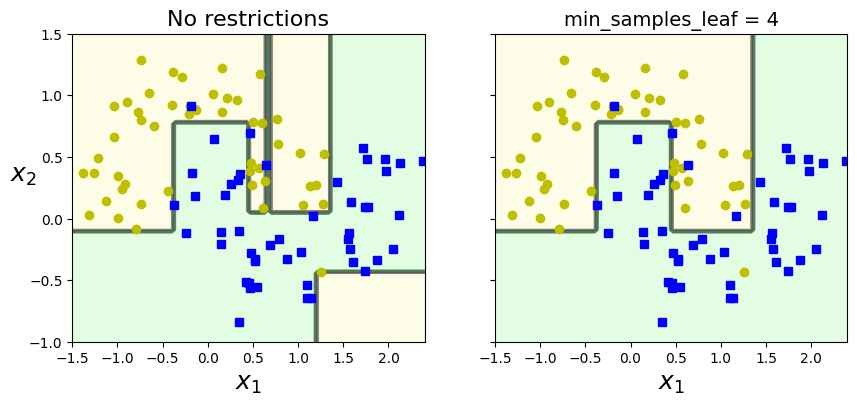

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")
plt.show()

다음 그림은 moons 데이터셋에 훈련시킨 2개의 결정 트리를 보여준다. 왼쪽 결정 트리는 규제를 적용하지 않은 기본 매개변수를 사용하여 훈련시켰고, 오른쪽 결정 트리는 `min_samples_leaf=4`로 지정하여 훈련시켰다.

확실히 왼쪽 모델은 과대적합되었고, 오른쪽 모델은 일반화 성능이 더 좋을 것 같아 보인다.

## 6.8 회귀
결정 트리는 회귀 문제에도 사용할 수 있다. 사이킷런의 `DecisionRegressor`를 사용하면 된다.

아래의 예제는 잡음이 섞인 2차 함수 $y=4(x-0.5)^2+$noise 형태의 임의의 데이터셋을 만들어 `max_depth=2`로 설정하여 회귀 트리를 만든 것이다.


In [ ]:
# 2차 다항식 훈련세트 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
        tree_reg,
        out_file="rdsp_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

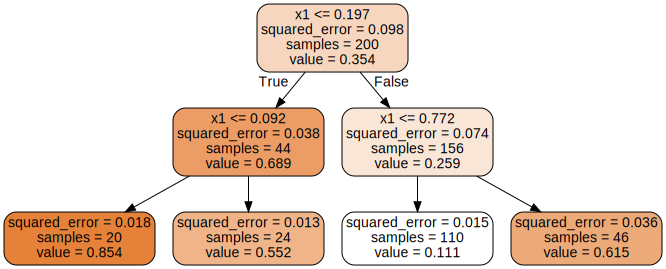

In [ ]:
Source.from_file("rdsp_tree.dot")

만들어진 트리는 위의 그림과 같으며, 앞서 만든 분류 트리와 매우 비슷해 보인다. 주요한 차이는 **각 노드에서** 클래스를 예측하는 대신 **어떤 값을 예측한다**는 것이다.

예를 들어 $x_1=0.6$인 샘플의 클래스를 예측한다고 가정할때, 루트 노드부터 시작해서 트리를 순회하여 결국 value=0.111인 리프 노드에 도달하게 된다. 그리고 이 리프 노드에 있는 110개의 **훈련 샘플들의 평균 타겟값이 예측값**이 된다. 이 **예측값을 사용해 110개의 샘플에 대한 평균제곱오차 MSE를 계산**하면 0.015가 된다.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)  # max_depth=2
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)  # max_depth=3
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=1, label=r"$\hat{y}$")

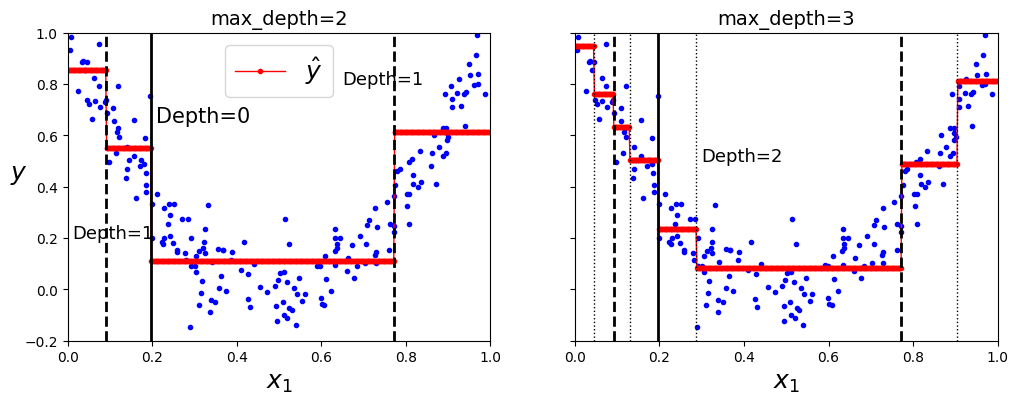

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

# 왼쪽 그림
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

# 오른쪽 그림
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

위의 결정 트리 회귀 모델의 예측은 왼쪽 그림과 같으며, 오른쪽 그림은 `max_depth`를 3으로 설정했을 때의 예측이다.

**각 영역의 예측값**은 항상 **그 영역에 있는 타겟값의 평균**이 된다. 알고리즘은 **예측값과 가능한 많은 샘플이 가까이 있도록 영역을 분할**한다.

결정 트리 회귀 모델의 규제는 `CART` 알고리즘이 노드 분할에 사용하는 기준(`criterion`)인 하이퍼파라미터에 사용되는 값을 제외하고
분류 모델의 경우와 완전히 동일하다. 회귀에서의 `CART` 알고리즘은 훈련 세트를 불순도가 최소가 되는 방향으로 분할하는 대신, **평균제곱오차(MSE)를 최소화**하도록 분할하는 것을 제외하고는 거의 비슷하게 작동한다.

- 분류모델의 비용함수 기준: 지니 불순도(`gini`) 또는 엔트로피(`entropy`)
- 회귀모델의 비용함수 기준: 평균제곱오차(`mse`), 프리드먼 평균제곱오차(`friedman_mse`), 평균절대오차(`mae`)

분류에서와 같이 회귀 작업에서도 결정 트리가 과대적합되기 쉽다. 규제가 없이 기본 매개변수를 사용하면 아래의 왼쪽 그림과 같이 예측하며, 확실히 훈련 세트에 크게 과대적합되었다는 것을 알 수 있다.

매개변수를 `min_samples_leaf=10`으로 지정하면 오른쪽 그림처럼 훨씬 그럴싸한 모델을 만들 수 있다.


In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

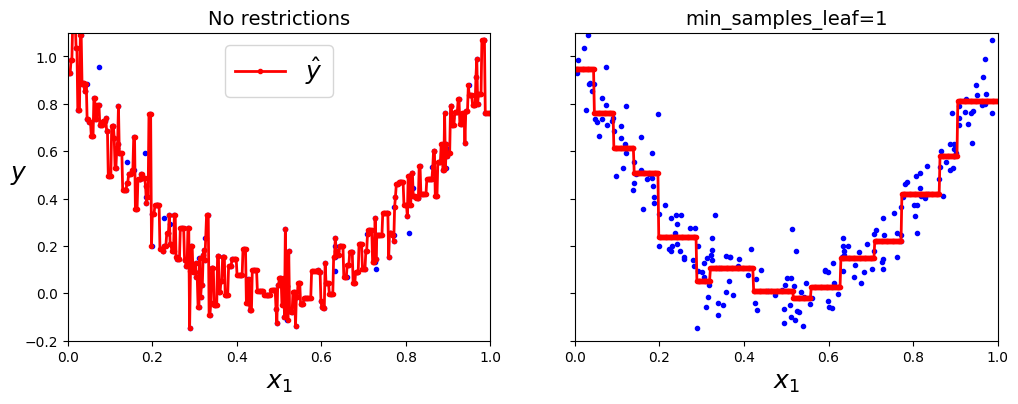

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

# 왼쪽 그림
plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

# 오른쪽 그림
plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

## 6.9 불안정성
결정 트리는 이해하고 해석하기 쉽고 사용하기 편하여 여러 용도로 사용할 수 있으며, 성능도 뛰어나다.

하지만 몇가지 제한 사항이 있는데, 결정 트리는 모든 분할이 축에 수직인 **계단 모양의 결정 경계**를 만드므로 **훈련 세트의 회전에 민감**하다.

In [ ]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

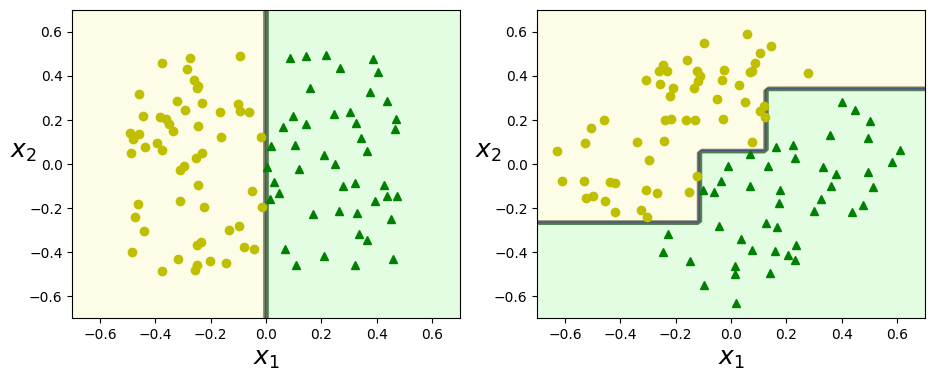

In [ ]:
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.show()

위 그림은 간단하게 선형으로 구분될 수 있는 데이터셋의 예시이다. 왼쪽은 원래의 데이터셋이고, 오른쪽은 45' 회전한 데이터셋이다.

왼쪽의 결정 트리는 하나의 선으로 쉽게 데이터를 구분하였지만, 오른쪽의 결정 트리는 불필요하게 구불구불하게 나타난다. 결과적으론 두 결정 트리 모두 훈련 세트를 완벽하게 학습하지만 오른쪽 모델은 잘 일반화될 것 같지 않다.

In [ ]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장 너비가 큰 Iris-Versicolor

array([[4.8, 1.8]])

In [ ]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

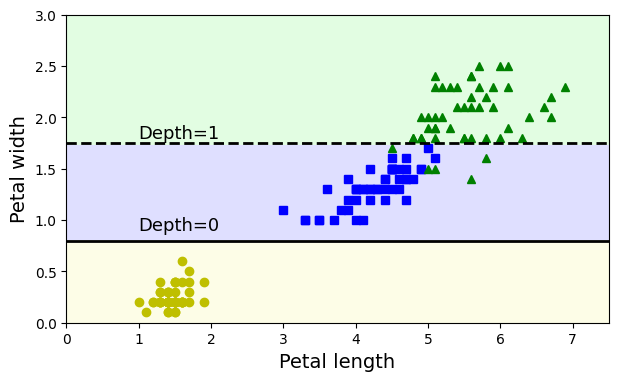

In [ ]:
plt.figure(figsize=(7, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=13)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
plt.show()

**결정 트리의 주된 문제**는 **훈련 데이터에 있는 작은 변화에도 매우 민감**하다는 것이다.

위의 그림은 훈련 세트에서 가장 넓은 Versicolor인 꽃잎 길이가 4.8cm이고 꽃잎 너비가 1.8cm인 샘플을 제거하고 결정 트리를 훈련시킨 결과이다.

그리고 아래의 그림은 원래 데이터에 아무 변화도 주지 않은, 즉 가장 넓은 Versicolor 샘플도 포함하여 결정 트리를 훈련시킨 것이다.

두 그림의 결정 경계가 다른 것으로 보아 하나의 샘플을 더하고 빼는 작은 변화에도 결정 트리가 매우 민감하게 반응한다는 것을 확인할 수 있다.

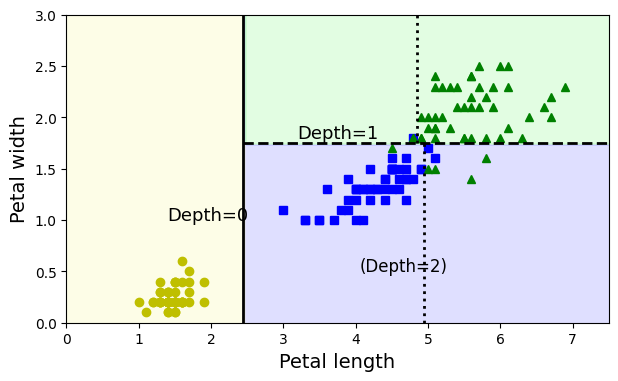

In [ ]:
plt.figure(figsize=(7, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=13)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=12)
plt.show()

사실 사이킷런에서 사용하는 훈련 알고리즘은 **각 노드에서 평가할 후보 특성을 무작위로 선택하여 확률적**이기 때문에 `random_state` 매개변수를 지정하지 않으면 같은 훈련 데이터에서도 다른 모델을 얻게 될 수 있다.